
# Геометричні перетворення зображень

У цій лабораторній роботі розглянуті наступні приклади геометричних перетворень зображень:
1. Масшатбування
2. Обертання
3. Переміщення
4. Перекіс

Геометричні перетворення зображень - перетворення, які змінюють просторові взаємозв'язким між пікселями зображень. Геометричне перетворення зображень можна розділити на дві операції:
* просторове перетворення координат;
* інтерполяція значень яскравості пікселів.

Просторове перетворення координат має наступний вигляд:

$$\begin{eqnarray}
(x_t,y_t) = T[(x, y)]
\end{eqnarray}$$

* **$\(x, y)\$** - координати пікселя вхідного зображення;<br>

* **$\(x_t, y_t)\$** - координати пікселя вихідного зображення.<br>

Наприклад, наступне перетворення виконує масшатбування вхідного зображення:

$$\begin{eqnarray}
(x_t,y_t) = T[(x, y)] = (c_x\cdot x, c_y\cdot y)
\end{eqnarray}$$

Під час цифрової обробки зображень часто використовують афінне перетворення координат, яке є комбінацією масштабування, обертання, переміщення, перекосу:

$$
\begin{bmatrix} x_t \\ y_t \end{bmatrix} = 
\begin{bmatrix} A\end{bmatrix}_{2x3}
\begin{bmatrix} x \\ y\end{bmatrix} = 
\begin{bmatrix} c_x & s_h \\ s_v & c_y\end{bmatrix} \begin{bmatrix} x \\ y\end{bmatrix} + 
\begin{bmatrix} t_x \\ t_y\end{bmatrix}
$$

Дане перетворення переміщує пікселі вхідного зображення у нове місце на вихідному зображенні. Далі необхідно для цих нових пікселів визначити значення яскравості. Для цього використовують один із відомих методів інтерполяції значень яскравості пікслелів - метод найближчого сусіда, білінійна та кубічна інтерполяції.

Відомі два способи перетворення координат:
* пряме відображення - для кожного пікселя вхідного зображення визначається просторові координати на вихідному зображенні згідно приведеної формули;
* зворотнє відображення - для кожного пікселя вихідного зображення визначаєтья просторові координати на вхідному зображенні згідно зворотнього перетворення:
$$
\begin{bmatrix} x \\ y \end{bmatrix} = 
\begin{bmatrix} A\end{bmatrix}_{2x3}^{-1}
\begin{bmatrix} x_t \\ y_t\end{bmatrix} = 
\begin{bmatrix} c_x & s_h \\ s_v & c_y\end{bmatrix}^{-1} \left(\begin{bmatrix} x_t \\ y_t\end{bmatrix} - 
\begin{bmatrix} t_x \\ t_y\end{bmatrix}\right)
$$

### Імпортуємо необхдіні пакети та бібліотеки

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Зчитаємо та відобразимо вхідне чорно-біле зображення.

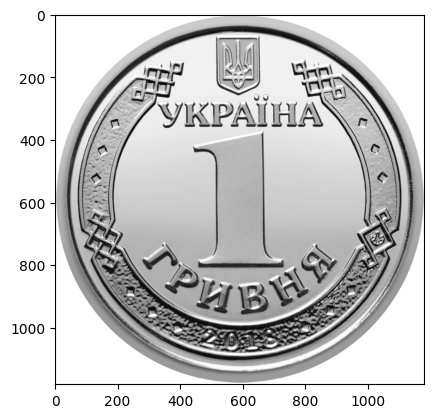

In [3]:
img = cv2.imread("./examples/hryvnia.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show();

Визначимо розміри вхідного зображення - висоту та ширину.

In [3]:
shape = img.shape
height = shape[0]
width = shape[1]
print("Height : %d" % height)
print("Width : %d" % width)

Height : 1181
Width : 1181


### Масштабування

При масштабуванні зображення на коефіцієнти  $c_x$ та $c_y$ у напрямку X та Y, відповідно, перетворення координат буде мати наступний вигляд:

$$
\begin{bmatrix} x_t \\ y_t \end{bmatrix} = 
\begin{bmatrix} c_x & 0 \\ 0 & c_y\end{bmatrix} \begin{bmatrix} y \\ x\end{bmatrix}
$$

Для масштабування вхідного зображння у OpenCV використовується функція **resize**.

### Синтаксис функції
    dst = cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
Параметри:
* **src** - вхідне зображення;<br>
* **dsize** - розмір вихідного зображення (якщо не задано, то використовуються коефіцієнти масштабування);<br>
* **fx** - коефіцієнт масштабування по горизонтальній осі (якщо не задано використовується розмір вихідного зображення);<br>
* **fy** - коефіцієнт масштабування по вертикальній осі (якщо не задано, то використовується розмір вихідного зображення);<br>
* **interpolation** - тип інтерполяції:
    * cv2.INTER_NEAREST - інтерполяція методом найближчого сусіда;
    * cv2.INTER_LINEAR - білінійна інтерполяція;
    * cv2.INTER_AREA - зчитування зображення без змін при наявності альфа-каналу;
    * cv2.INTER_CUBIC - бікубічна інтерполяція;
    * cv2.INTER_LANCZOS4 - інтерполяція з використанням ядра Ланцоша.

Виконаємо масштабування вхідного зображення через завдання параметру **dsize = (200, 200)**. Це дозволить встановити точні значення розмріу вихідного зображення.

Height : 200
Width : 200


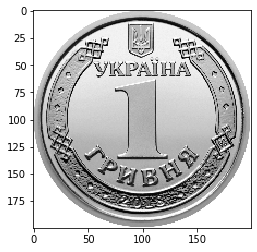

In [4]:
scale_dsize = cv2.resize(img, dsize = (200, 200), interpolation = cv2.INTER_LINEAR)
print("Height : %d" % scale_dsize.shape[0])
print("Width : %d" % scale_dsize.shape[1])
plt.imshow(scale_dsize, cmap='gray')
plt.show();

Виконаємо масштабування вхідного зображення через завдання параметрів **fx = 0.5, fy = 0.5**. Це дозволить зменшити розмір зображення по вертикальній та горизонтальній осям у два рази, відповідно.

Height : 590
Width : 590


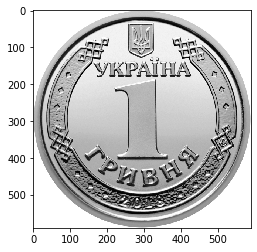

In [5]:
scale_fxfy = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
print("Height : %d" % scale_fxfy.shape[0])
print("Width : %d" % scale_fxfy.shape[1])
plt.imshow(scale_fxfy, cmap='gray')

### Обертання

При обертанні зображення на кут $\Theta$ перетворення координат буде мати наступний вигляд:

$$
\begin{bmatrix} x_t \\ y_t \end{bmatrix} = 
\begin{bmatrix} cos(\Theta) & sin(\Theta) \\ -sin(\Theta) & cos(\Theta)\end{bmatrix} \begin{bmatrix} y \\ x\end{bmatrix}
$$

Для обертання вхідного зображння у OpenCV необхідно:
* визначити матрицю обертання за допомогою функції **getRotationMatrix2D**;
* виконати афіне перетворення вхідного зображення за допмогою функції **warpAffine** та матриці обертання.

### Синтаксис функції
    dst = cv2.getRotationMatrix2D((x, y), angle, scale)
Параметри:
* **(x, y)** - координати центру обертання;<br>
* **angle** - кут обертання;<br>
* **scale** - коефіцієнт масштабування.<br>

Визначимо матриці обертання для кутів 90, 180, 270 градусів. Обертання проти годинникової стрілки.

In [6]:
M90 = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
M180 = cv2.getRotationMatrix2D((width/2, height/2), 180, 1)
M270 = cv2.getRotationMatrix2D((width/2, height/2), 270, 1)

### Синтаксис функції
    dst =  cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]    )
Параметри:
* **src** - вхідне зображення;<br>
* **M** - матриція обертання;<br>
* **dsize** - розмір вихідного зображення;<br>
* **flags** - комбінація параметрів - тип інтерполяції та тип перетворення;<br>
* **borderMode** - метод екстраполяції меж зображення;<br> 
* **borderValue** - значення яскравості для заповнення меж зображення, 0 за замовченням.

Виконаємо афінне перетворення використовуючи визначені матриці обертання.

In [7]:
img_rot90 = cv2.warpAffine(img, M90, (width, height))
img_rot180 = cv2.warpAffine(img, M180, (width, height))
img_rot270 = cv2.warpAffine(img, M270, (width, height))

Відобразимо вхідне зображення та отримані зображення після перетворення.

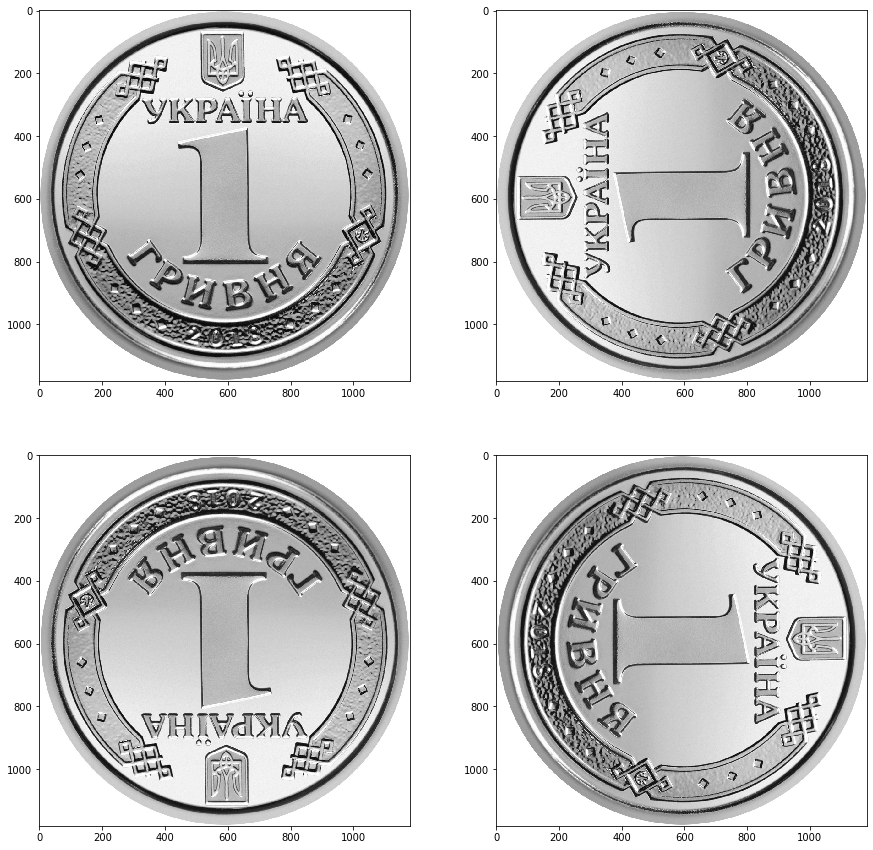

In [8]:
plt.figure(figsize = (15, 15))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow(img_rot90, cmap='gray')
plt.subplot(223)
plt.imshow(img_rot180, cmap='gray')
plt.subplot(224)
plt.imshow(img_rot270, cmap='gray')
plt.show();

### Переміщення

При переміщенні зображення на відстань $t_x$ та $t_y$ у напрямку X та Y, відповідно, перетворення координат буде мати наступний вигляд:

$$
\begin{bmatrix} x_t \\ y_t \end{bmatrix} = 
\begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix} \begin{bmatrix} y \\ x\end{bmatrix} + 
\begin{bmatrix} t_x \\ t_y\end{bmatrix}
$$



Для переміщення вхідного зображеня необхідно:
* задати матрицю переміщення
* виконати афіне перетворення вхідного зображення за допмогою функції warpAffine та матриці переміщення

In [9]:
M_hor = np.float32([[1, 0, width/2], [0, 1, 0]])
M_ver = np.float32([[1, 0, 0], [0, 1, height/2]])
M = np.float32([[1, 0, width/2], [0, 1, height/2]])

Виконаємо афінне перетворення використовуючи задані матриці переміщення.

In [10]:
img_trhor = cv2.warpAffine(img, M_hor, (width, height))
img_trver = cv2.warpAffine(img, M_ver, (width, height))
img_tr = cv2.warpAffine(img, M, (width, height))

Відобразимо вхідне зображення та отримані зображення після перетворення.

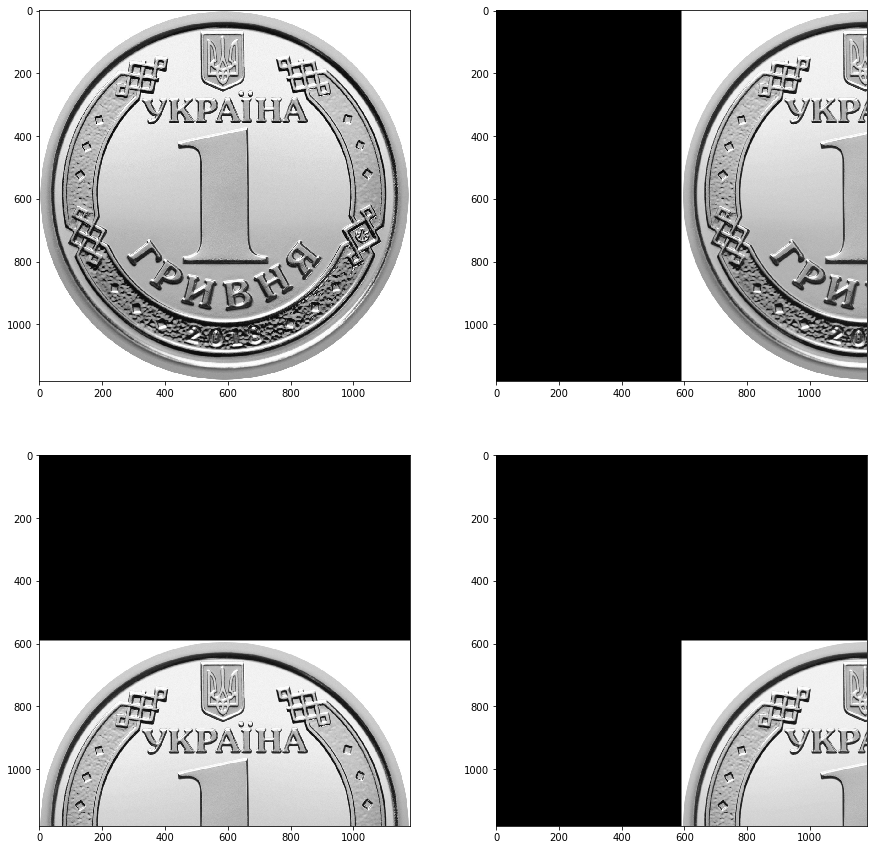

In [11]:
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow(img_trhor, cmap='gray')
plt.subplot(223)
plt.imshow(img_trver, cmap='gray')
plt.subplot(224)
plt.imshow(img_tr, cmap='gray')
plt.show();

### Перекіс

При перекісу зображення по осі  X та Y перетворення координат буде мати наступний вигляд:

$$
\begin{bmatrix} x_t \\ y_t \end{bmatrix} = 
\begin{bmatrix} 1 & s_h \\ s_v & 1\end{bmatrix} \begin{bmatrix} y \\ x\end{bmatrix}
$$
Для перекісу вхідного зображеня необхідно:
* задати матрицю перекісу
* виконати афіне перетворення вхідного зображення за допмогою функції warpAffine та матриці перекісу

In [12]:
M_sk1 = np.float32([[1,1,1], [0,1,1]])
M_skm1 = np.float32([[1,0,1], [1,1,1]])
M_skh1 = np.float32([[1,0,1], [1,1,1]])

Виконаємо афінне перетворення використовуючи задані матриці перекісу.

In [13]:
sk1 = cv2.warpAffine(img, M_sk1, (width, height))
skm1 = cv2.warpAffine(img, M_skm1, (width, height))
skh1 = cv2.warpAffine(img, M_skh1, (width, height))

Відобразимо вхідне зображення та отримані зображення після перетворення.

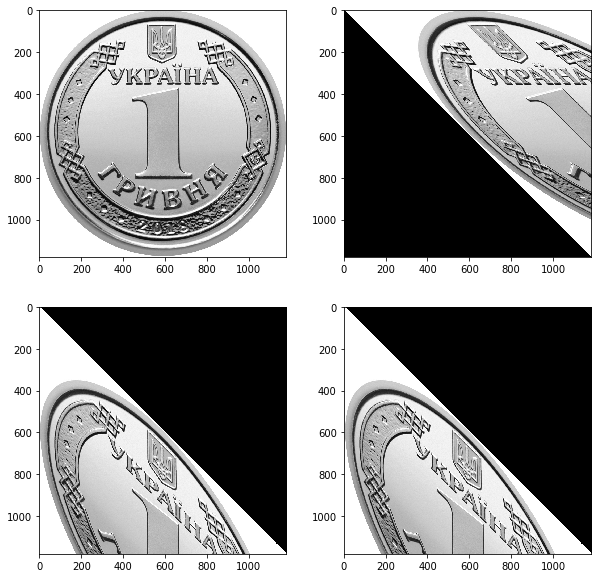

In [14]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow(sk1, cmap='gray')
plt.subplot(223)
plt.imshow(skm1, cmap='gray')
plt.subplot(224)
plt.imshow(skh1, cmap='gray')
plt.show();

## Перспективне перетворення (перетворення перспективи)
Перспективне перетворення або гомографія - перетворення площини на себе при якій прямі лінії залишаються прямими.

$$
\begin{bmatrix} x_t \\ y_t  \\ 1\end{bmatrix} = 
\begin{bmatrix} H\end{bmatrix}_{3x3}
\begin{bmatrix} x \\ y \\ 1 \end{bmatrix} = 
\begin{bmatrix} h_{01} & h_{02} & h_{03} \\ h_{11} & h_{12} & h_{13} \\ h_{21} & h_{22} & h_{23}\end{bmatrix} \begin{bmatrix} x \\ y \\ 1\end{bmatrix}
$$

Для перспективного перетворення вхідного зображння у OpenCV необхідно:
* визначити матрицю перспективного перетворення (гомографії) за допомогою функції getPerspectiveTransform;
* виконати перспективне перетворення вхідного зображення за допмогою функції warpPerspective та матриці гомографії.

Завантажуємо вхідне зображення.

In [15]:
img = cv2.imread('./examples/sudoku.png', )

Для визначення матриці гомографії необхідно задати 4 опорні точки на вхідному зображенні та 4 опорні точки на вихідному зображенні. В даному прикладі точки задаються по годинниковій стрілці починаючи з лівого верхнього кута поля судоку.

In [16]:
src = np.float32([[70, 80],[500, 65],[525, 530],[30,520]])
dst = np.float32([[0,0],[300,0],[300,300],[0,300]])

Визначаємо матрицію гомографії.

In [17]:
M = cv2.getPerspectiveTransform(src, dst)

Виконуємо перспективне перетворення вхідного зображення, використовуючи отриману матрицю гомографії, та задаємо розмір вихідного зображення 300х300.

In [18]:
out = cv2.warpPerspective(img, M, (300,300))

Відображаємо вхідне та вихідне зображення.

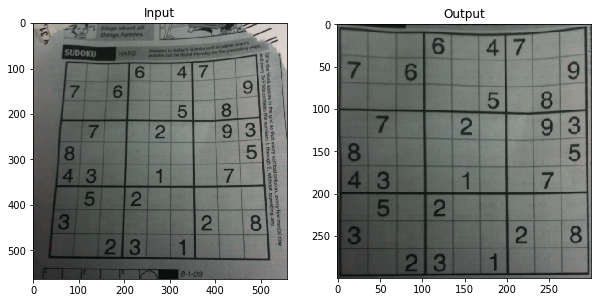

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(out),plt.title('Output')
plt.show()

# Завдання
## 1. Збільшити датасет
1.1 Отримати список зображень у директорії "./assignemnts/dataset"

In [2]:
import os
img_list = os.listdir('./assignments/dataset')

['image_0001.jpg',
 'image_0002.jpg',
 'image_0003.jpg',
 'image_0004.jpg',
 'image_0005.jpg',
 'image_0006.jpg',
 'image_0007.jpg',
 'image_0008.jpg',
 'image_0009.jpg',
 'image_0010.jpg']

1.2 Реалізувати функцію аугментації зображення шляхом комбінацій наступних перетворень:
* поелементне перетворення:<br>
  - інверсія яскравості пікселів
  - гамма корекція яскравості пікселів
* просторова фільтраці:
  - згладжування зображення
* геометричне перетворення:
  - перевернути зображення горизонтально/вертикально
  - переміщення зображення
  - обертання зображення
  - перекіс зображення

In [50]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

def data_augmentation(img,i):
    image = cv2.imread(img+i)
    image = ~image
    cv2.imwrite("./test/"+i[:-4]+"_"+"img_inv.png",image)
    
    image2 = cv2.imread(img+i)
    gammaImg = gammaCorrection(image2, 2.2)
    cv2.imwrite("./test/"+i[:-4]+"_"+"gamma_corrected.png",gammaImg)
    
    image3 = cv2.imread(img+i)
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(image3,-1,kernel)
    cv2.imwrite("./test/"+i[:-4]+"_"+"filtered.png",dst)
    
    image4 = cv2.imread(img+i)
    

1.3 Для кожного зображення зі списку **img_list**, використовуючи функцію **data_augmentation**, виконати 10 доповнень та зберегти результат у директорії "./assignemnts/dataset":

In [51]:
for i in img_list:
    data_augmentation('./assignments/dataset/',i)

## 2. Зробити перетворення перспективи вхідного зображення для визначення меж дорожньої розмітки
<table><tr>
<td> <img src="./assignments/test_img.jpg" height="300" width="300"> </td>

</tr></table>

2.1. Відкрити та завантажити наступне зображення:
    * assignments/test_img.jpg

In [ ]:
img = cv2.imread(***)

2.2 Задати розмір вихідного зображення:

In [ ]:
OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500

2.3 Задати координати ROI вхідного зображення: 

In [ ]:
src = np.float32([[*, *], [*, *], [*, *], [*, *]])

2.4 Задати координати ROI вихідного зображення: 

In [ ]:
dst = np.float32([[*, *], [*, *], [*, *], [*, *]])

2.5 Визначити матрицю перетворення перспективи

In [ ]:
M = cv2.getPerspectiveTransform(***, ***)

2.6 Виконати перетворення перспективи

In [ ]:
wraped_img = cv2.***

2.7 Відобразити вихідне зображення

In [ ]:
plt.imshow(***)
plt.show()

### 3*. Реалізувати геометричне перетворення зображеннь (не використовуючи функції OpenCV)
Перетворення координат:
* афінне перетворення*
* перетворення перспективи

Інтерполяція яскравості пікселів:
* методом найближчого сусіда
* білінійна інтерполяція**
* бікубічна інтерполяція***